# Introduction
Watching movies has become one of important entertainments for people to relax in recent years, and audiences are always in pursuit of movies with high quality. To meet audiences’ demand, some developers construct the favorite viewing platform, where movie trailers, box office queries, movie rankings, film and television information and other information are provided to audiences. During whole project, I scrape the TOP100 movies form [Maoyan Movies](https://maoyan.com/board/4), make a list of the high-quality movies and analyze the reasons why these movies are favorited by people.

In WebScraping.ipynb, there are three sections of codes, Data scraping, Data cleaning and Data analysis. In section one, the codes are designed to scrape the information of TOP100 movies, including title, foreign title, type, released date, country, duration, director, actors and cumulative, and to save this information into csv file, called HongxuanJia_1824717.csv. In section 2, renaming the columns, altering types of certain attributes and assigning new attributes have been done, which simplify the process of data analysis. In last section, pandas and matplotlib.pyplot library have been utilized to deal with tasks about data processing and data visualization. 

In data analysis report, I use tables and figures that are made in WebScraping.ipynb to exhibit the following information: 1) Description of quantitative data of TOP100 movies; 2) Analysis of category data of TOP100 movies; 3) The interesting relationships between variables of movies. In each part, I summarize the feature of data and represent my own viewpoint. Therefore, the report has made advice to audience to select high-quality movies and provide practical value to film makers to produce more attractive films.

# 1. Scrapying the information of the Top100 movies from Maoyan
The code shown below

If IndexError or ArrayError comes up, please click [Maoyan](https://maoyan.com/board/4) and complete verification. 

In [106]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.notebook_repr_html', True)

findTitle = re.compile(r'<h1 class="name">(.*)</h1>')
findTitle_En = re.compile(r'<div class="ename ellipsis">(.*)</div>')
findDuration = re.compile(r'</li>\n<li class="ellipsis">\n\s*.*\n\s*/\s(.*)分钟')
findReleaseDate = re.compile(r'<li class="ellipsis">(\d*-\d*-\d*).*</li>')
findCountry = re.compile(r'</li>\n<li class="ellipsis">\n\s*(.*)')
findType = re.compile(r'<a class="text-link" href=".*" target="_blank"> (.*) </a>')
findActors = re.compile(r'<a class="name" href=".*" target="_blank">\n(.*)')

def Scraping():
    header = {
        'Accept': '*/*;',
        'Connection': 'keep-alive',
        'Accept-Language': 'zh-CN,zh;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Host': 'maoyan.com',
        'Referer': 'http://maoyan.com/',
        "User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36",
        "Cookie": "__mta=188595095.1634129075782.1634129107541.1634129380351.5; uuid_n_v=v1; uuid=52179F002C2311EC9CDFC5E65AA9DF77506337BAA53549C38220B9B22BFD2ED3; _csrf=63ca30dd74f921545034026af07edc3f5cb92558225cd25fe4d63b743a9a49f3; Hm_lvt_703e94591e87be68cc8da0da7cbd0be2=1634129076; _lxsdk_cuid=17c79aede11c8-0e1d379ca445ff-113f6757-113a00-17c79aede11c8; _lxsdk=52179F002C2311EC9CDFC5E65AA9DF77506337BAA53549C38220B9B22BFD2ED3; Hm_lpvt_703e94591e87be68cc8da0da7cbd0be2=1634129380; _lxsdk_s=17c79aede12-5ea-b49-319%7C%7C12"
    }

    mainURL = "https://maoyan.com/board/4?offset="
    URLlists = []
    Rating = []
    for i in range(0,10):
        # Call movies_urls(URL,header) method
        URLlists += movies_urls(mainURL+str(i*10),header)["external_movies_urls"]
        Rating += movies_urls(mainURL+str(i*10),header)["Rating"]
    # print(URLlists)
    # Call movie_information(URLlists,header) method
    movies_infor = movie_information(URLlists, header)
    movies_infor["Rating"] = Rating
    return movies_infor

def movies_urls(URL,header):
    Rating = []
    external_movies_urls = []
    response = requests.get(url=URL,headers=header)
    try:
        if response.status_code == 200:
            response.encoding = "utf-8"
        else:
            print("None")
    except requests.URLRequired as e:
        if hasattr(e, "code"):
            print(e.code)
        if hasattr(e, "reason"):
            print(e.reason)

    link_soup = BeautifulSoup(response.text, 'lxml')
    # rating   <i class="integer">9.</i><i class="fraction">6</i>
    rating_integers = link_soup.find_all("i", class_="integer")
    rating_fractions = link_soup.find_all("i", class_="fraction")
    rating_integers = [i.text for i in rating_integers]
    rating_fractions = [j.text for j in rating_fractions]
    for i in range(0, 10):
        rating = rating_integers[i] + rating_fractions[i]
        Rating.append(rating)
    # hrefLink
    hrefLink = link_soup.find_all("p", class_ = "name")
    movies_urls = [i.a.get('href') for i in hrefLink]
    for i in movies_urls:
        external_movies_urls.append("https://maoyan.com"+i)
    json = {
        "external_movies_urls": external_movies_urls,
        "Rating" : Rating
    }
    return json

def movie_information(URLlists,header):
    Title = []
    Title_En = []
    Release_Date = []
    Country = []
    Duration = []
    Type = []
    Name_of_director = []
    Name_of_actors = []
    Cumulative_income = []
    for i in URLlists:
        movieURL = i
        response = requests.get(url=movieURL, headers=header)
        response.encoding = "utf-8"
        soup = BeautifulSoup(response.text, "lxml")
        # Create item1 which includes title, title_en, type, country, duration and release_date
        item1 = soup.find("div",
                          class_="wrapper clearfix")  # item1 contains title, title_en, type, country, duration and release_date
        item1 = str(item1)
        # title
        title = re.findall(findTitle, item1)
        Title += title
        # title_en
        title_en = re.findall(findTitle_En, item1)
        Title_En += title_en
        # type
        type = re.findall(findType, item1)
        Type.append(type)
        # release_date
        release_date = re.findall(findReleaseDate, item1)
        Release_Date += release_date
        # country
        country = re.findall(findCountry, item1)
        Country += country
        # duration
        duration = re.findall(findDuration, item1)
        Duration += duration
        # director
        try:
            director = soup.find("a", class_="name").text
            director = director.replace("\n", "").strip()
        except AttributeError as e:
            director = "None"
        Name_of_director.append(director)

        # create item2 wich includes actors
        item2 = soup.find_all("div", class_="celebrity-group")  # item2 contains director and actors.
        item2 = str(item2)
        # actors
        actors = re.findall(findActors, item2)
        external_actors = []
        for i in actors:
            external_actors.append(i.strip())
        Name_of_actors.append(external_actors[1:5])
        # Cumulative_income
        try:
            cumulative_income = soup.find_all("div", class_="mbox-name")
            cumulative_income = cumulative_income[2].text + "0000"
            if cumulative_income != "暂无0000":
                Cumulative_income.append(cumulative_income)
            else:
                Cumulative_income.append("None")
        except IndexError as e:
            Cumulative_income.append("None")
    json = {
        "Title" : Title,
        "Title_En" : Title_En,
        "Type" : Type,
        "Release_Date" : Release_Date,
        "Country" : Country,
        "Duration" : Duration,
        "Name_of_director" : Name_of_director,
        "Name_of_actors" : Name_of_actors,
        "Cumulative_income" : Cumulative_income,
    }
    return json

def dic_to_csv(dic_data):
    pd.DataFrame(dic_data).to_csv('.//HongxuanJia_1824717.csv')


if __name__ == '__main__':
    movies_info = Scraping()
    dic_to_csv(movies_info)

# 2. Cleaning the data

## 2.1 Loading the csv file 

In [107]:
movies = pd.read_csv(".//HongxuanJia_1824717.csv",sep = ",")
movies.columns
movies.dtypes

Unnamed: 0             int64
Title                 object
Title_En              object
Type                  object
Release_Date          object
Country               object
Duration               int64
Name_of_director      object
Name_of_actors        object
Cumulative_income     object
Rating               float64
dtype: object

Replacing "None" with pd.NA in Cumulative_income

## 2.2 Modifying the tables

Renaming the columns

In [108]:
movies.columns = ['Rank', 'Title', 'Title_En', 'Type', 'Release_Date', 'Country', 'Duration_min', 'Name_of_director', 'Name_of_actors', 'Cumulative_income', 'Rating']
movies.Rank = movies.Rank+1

In [109]:
movies.replace("None",pd.NA,inplace=True)

Altering type of certain attribute

In [110]:
# transform str into datetime
movies["Release_Date"] = pd.to_datetime(movies["Release_Date"])
# transform str into numeric
movies["Duration_min"] = pd.to_numeric(movies["Duration_min"])
# transform str into numeric
movies["Cumulative_income"] = pd.to_numeric(movies["Cumulative_income"])

Assigning 

In [111]:
movies["Year"] = movies["Release_Date"].dt.year
movies["Month"] = movies["Release_Date"].dt.month

# 3. Data analysis

## 3.1 Describing quantitative data

Rating

In [112]:
r = movies.Rating.describe()
print(r)
r = r.to_frame()
r.to_excel("./tables/rating.xlsx")

count    100.000000
mean       8.978000
std        0.346871
min        8.000000
25%        8.700000
50%        8.950000
75%        9.300000
max        9.800000
Name: Rating, dtype: float64


Duration

In [113]:
d = movies.Duration_min.describe()
print(d)
d = d.to_frame()
d.to_excel("./tables/duration.xlsx")

count    100.000000
mean     128.550000
std       28.381732
min       80.000000
25%      109.750000
50%      124.500000
75%      140.000000
max      238.000000
Name: Duration_min, dtype: float64


Cumulative_income

In [114]:
ci = movies.Cumulative_income.describe()
print(ci)
ci = ci.to_frame()
ci.to_excel("./tables/cumulative_income.xlsx")

count    4.000000e+01
mean     4.363290e+08
std      6.479907e+08
min      2.000000e+04
25%      4.697500e+07
50%      1.731400e+08
75%      5.153700e+08
max      3.100020e+09
Name: Cumulative_income, dtype: float64


## 3.2 Sorting

Sorted by Release_Date

In [115]:
movies.sort_values(by="Release_Date")

,Rank,Title,Title_En,Type,Release_Date,Country,Duration_min,Name_of_director,Name_of_actors,Cumulative_income,Rating,Year,Month
52,53,乱世佳人,Gone with the Wind,"['剧情', '爱情', '历史', '战争']",1939-12-15,美国,238,乔治·库克,"['维克多·弗莱明', '费雯·丽', '克拉克·盖博', '奥利维娅·德哈维兰']",NaN,9.0,1939,12
59,60,罗马假日,Roman Holiday,"['剧情', '喜剧', '爱情']",1953-08-27,美国,118,威廉·惠勒,"['格利高里·派克', '奥黛丽·赫本', '埃迪·艾伯特', '哈特利·鲍尔']",NaN,9.0,1953,8
82,83,十二怒汉,12 Angry Men,"['剧情', '悬疑']",1957-04-13,美国,159,西德尼·吕美特,"['亨利·方达', '李·科布', '马丁·鲍尔萨姆', '杰克·瓦尔登']",NaN,9.1,1957,4
76,77,控方证人,Witness for the Prosecution,"['剧情', '悬疑', '犯罪']",1957-12-17,美国,116,比利·怀德,"['泰隆·鲍华', '玛琳·黛德丽', '查尔斯·劳顿', '爱尔莎·兰切斯特']",NaN,8.5,1957,12
44,45,飞越疯人院,One Flew Over the Cuckoo's Nest,['剧情'],1975-11-19,美国,133,米洛斯·福尔曼,"['杰克·尼科尔森', '路易丝·弗莱彻', '威尔·萨姆森', '丹尼·德维托']",NaN,8.8,1975,11
40,41,末代皇帝,The Last Emperor,['剧情'],1987-10-04,"英国,意大利,中国大陆,法国,美国",163,贝纳尔多·贝托鲁奇,"['尊龙', '陈冲', '彼得·奥图尔', '邬君梅']",NaN,8.7,1987,10
32,33,死亡诗社,Dead Poets Society,['剧情'],1989-06-02,美国,128,彼得·威尔,"['罗宾·威廉姆斯', '伊桑·霍克', '柯特伍德·史密斯', '梅洛拉·沃尔特斯']",NaN,8.7,1989,6
81,82,剪刀手爱德华,Edward Scissorhands,"['剧情', '爱情', '奇幻']",1990-12-06,美国,105,蒂姆·波顿,"['约翰尼·德普', '薇诺娜·瑞德', '黛安娜·维斯特', '安东尼·迈克尔·豪尔']",NaN,8.8,1990,12
78,79,天空之城,天空の城ラピュタ,"['动画', '奇幻', '冒险']",1992-05-01,日本,125,宫崎骏,"['寺田农', '鹫尾真知子', '龟山助清', '铃木玲子']",NaN,9.0,1992,5
38,39,闻香识女人,Scent of a Woman,['剧情'],1992-12-23,美国,157,马丁·布莱斯特,"['阿尔·帕西诺', '克里斯·奥唐纳', '加布里埃尔·安瓦尔', '菲利普·塞默·霍夫曼']",NaN,8.8,1992,12


Sorted by Country

In [116]:
movies.sort_values(by="Country")

,Rank,Title,Title_En,Type,Release_Date,Country,Duration_min,Name_of_director,Name_of_actors,Cumulative_income,Rating,Year,Month
45,46,一一,Yi yi: A One and a Two,"['剧情', '爱情', '家庭']",2000-06-26,"中国台湾,日本",173,杨德昌,"['吴念真', '金燕玲', '李凯莉', '林孟瑾']",NaN,8.9,2000,6
95,96,饮食男女,Eat Drink Man Woman,"['剧情', '家庭']",1994-08-03,"中国台湾,美国",124,李安,"['郎雄', '吴倩莲', '杨贵媚', '王渝文']",NaN,8.8,1994,8
0,1,哪吒之魔童降世,Ne Zha,"['动画', '喜剧', '奇幻']",2019-07-26,中国大陆,110,饺子,"['吕艳婷', '囧森瑟夫', '瀚墨', '陈浩']",6.650700e+08,9.6,2019,7
91,92,鬼子来了,Devils on the Doorstep,"['剧情', '战争']",2000-05-13,中国大陆,162,姜文,"['姜文', '姜宏波', '陈强', '香川照之']",NaN,8.9,2000,5
75,76,大话西游之大圣娶亲,A Chinese Odyssey Part Two - Cinderella,"['喜剧', '爱情', '动作', '奇幻']",2014-10-24,中国大陆,110,刘镇伟,"['周星驰', '朱茵', '莫文蔚', '蔡少芬']",1.868300e+08,8.8,2014,10
97,98,二十二,Twenty Two,['纪录片'],2017-08-14,中国大陆,99,郭柯,"['毛银梅', '何玉珍', '李凤云', '张先兔']",1.706200e+08,9.2,2017,8
1,2,我不是药神,Dying To Survive,"['剧情', '喜剧']",2018-07-05,中国大陆,117,文牧野,"['徐峥', '周一围', '王传君', '谭卓']",3.100020e+09,9.6,2018,7
67,68,让子弹飞,Let The Bullets Fly,"['剧情', '喜剧', '动作', '西部']",2010-12-16,"中国大陆,中国香港",132,姜文,"['姜文', '周润发', '葛优', '刘嘉玲']",6.367500e+08,8.5,2010,12
7,8,霸王别姬,Farewell My Concubine,"['剧情', '爱情']",1993-07-26,"中国大陆,中国香港",171,陈凯歌,"['张国荣', '张丰毅', '巩俐', '吕齐']",5.000000e+04,9.4,1993,7
29,30,活着,To Live,"['剧情', '家庭', '历史']",1994-05-17,"中国大陆,中国香港",132,张艺谋,"['葛优', '巩俐', '牛犇', '郭涛']",NaN,9.0,1994,5


Sorted by Type

In [117]:
movies.sort_values(by="Type")

,Rank,Title,Title_En,Type,Release_Date,Country,Duration_min,Name_of_director,Name_of_actors,Cumulative_income,Rating,Year,Month
90,91,猫鼠游戏,Catch Me If You Can,"['剧情', '传记', '犯罪']",2003-04-11,"美国,加拿大",141,史蒂文·斯皮尔伯格,"['莱昂纳多·迪卡普里奥', '汤姆·汉克斯', '克里斯托弗·沃肯', '马丁·辛']",1.200000e+07,8.6,2003,4
49,50,美丽心灵,A Beautiful Mind,"['剧情', '传记']",2001-12-13,美国,135,朗·霍华德,"['罗素·克劳', '詹妮弗·康纳利', '艾德·哈里斯', '克里斯托弗·普卢默']",NaN,8.8,2001,12
50,51,搏击俱乐部,Fight Club,"['剧情', '动作', '悬疑', '惊悚']",1999-09-10,"美国,德国",139,大卫·芬奇,"['爱德华·哈里森·诺顿', '布拉德·皮特', '海伦娜·伯翰·卡特', '米特·洛夫']",NaN,8.8,1999,9
8,9,这个杀手不太冷,Léon,"['剧情', '动作', '犯罪']",1994-09-14,法国,110,吕克·贝松,"['让·雷诺', '加里·奥德曼', '娜塔莉·波特曼', '丹尼·爱罗']",NaN,9.4,1994,9
96,97,蝙蝠侠：黑暗骑士,The Dark Knight,"['剧情', '动作', '科幻', '惊悚']",2008-07-14,"美国,英国",152,克里斯托弗·诺兰,"['克里斯蒂安·贝尔', '希斯·莱杰', '阿伦·伊克哈特', '迈克尔·凯恩']",NaN,9.3,2008,7
12,13,辛德勒的名单,Schindler's List,"['剧情', '历史', '战争']",1993-11-30,美国,195,史蒂文·斯皮尔伯格,"['连姆·尼森', '拉尔夫·费因斯', '本·金斯利', '艾伯丝·戴维兹']",NaN,9.2,1993,11
4,5,绿皮书,Green Book,"['剧情', '喜剧', '传记']",2019-03-01,美国,130,彼得·法雷里,"['维果·莫腾森', '马赫沙拉·阿里', '琳达·卡德里尼', '塞巴斯蒂安·马尼斯科']",4.787200e+08,9.5,2019,3
39,40,三傻大闹宝莱坞,3 idiots,"['剧情', '喜剧', '冒险']",2011-12-08,印度,171,拉吉库马尔·希拉尼,"['阿米尔·汗', '黄渤', '卡琳娜·卡普', '汤唯']",1.396000e+07,9.1,2011,12
62,63,布达佩斯大饭店,The Grand Budapest Hotel,"['剧情', '喜剧', '冒险']",2014-06-14,"美国,德国,英国",100,韦斯·安德森,"['拉尔夫·费因斯', '托尼·雷沃罗利', '西尔莎·罗南', 'F·默里·亚伯拉罕']",NaN,8.7,2014,6
67,68,让子弹飞,Let The Bullets Fly,"['剧情', '喜剧', '动作', '西部']",2010-12-16,"中国大陆,中国香港",132,姜文,"['姜文', '周润发', '葛优', '刘嘉玲']",6.367500e+08,8.5,2010,12


Sortes by Directors

In [118]:
movies.sort_values(by="Name_of_director")

,Rank,Title,Title_En,Type,Release_Date,Country,Duration_min,Name_of_director,Name_of_actors,Cumulative_income,Rating,Year,Month
30,31,被嫌弃的松子的一生,嫌われ松子の一生,"['剧情', '歌舞']",2006-05-27,日本,130,中岛哲也,"['酒井圣博', '中谷美纪', '永山瑛太', '伊势谷友介']",NaN,8.5,2006,5
63,64,复仇者联盟4：终局之战,Avengers: Endgame,"['动作', '冒险', '奇幻']",2019-04-24,美国,181,乔·罗素,"['安东尼·罗素', '小罗伯特·唐尼', '克里斯·埃文斯', '马克·鲁法洛']",2.232840e+09,9.1,2019,4
52,53,乱世佳人,Gone with the Wind,"['剧情', '爱情', '历史', '战争']",1939-12-15,美国,238,乔治·库克,"['维克多·弗莱明', '费雯·丽', '克拉克·盖博', '奥利维娅·德哈维兰']",NaN,9.0,1939,12
27,28,放牛班的春天,Les choristes,"['剧情', '喜剧', '音乐']",2004-10-16,"法国,德国,瑞士",96,克里斯托夫·巴拉蒂,"['热拉尔·朱尼奥', '让-巴蒂斯特·莫尼耶', '玛丽·布奈尔', '凯德·麦拉德']",NaN,8.8,2004,10
99,100,致命魔术,The Prestige,"['剧情', '悬疑', '惊悚']",2006-10-17,"美国,英国",130,克里斯托弗·诺兰,"['休·杰克曼', '克里斯蒂安·贝尔', '迈克尔·凯恩', '斯嘉丽·约翰逊']",NaN,8.8,2006,10
10,11,盗梦空间,Inception,"['动作', '悬疑', '惊悚', '科幻']",2010-09-01,"美国,英国",148,克里斯托弗·诺兰,"['莱昂纳多·迪卡普里奥', '渡边谦', '约瑟夫·高登-莱维特', '玛丽昂·歌迪亚']",4.962000e+08,9.0,2010,9
17,18,星际穿越,Interstellar,"['剧情', '科幻', '冒险']",2014-11-12,美国,169,克里斯托弗·诺兰,"['马修·麦康纳', '安妮·海瑟薇', '杰西卡·查斯坦', '麦肯吉·弗依']",8.769700e+08,9.3,2014,11
96,97,蝙蝠侠：黑暗骑士,The Dark Knight,"['剧情', '动作', '科幻', '惊悚']",2008-07-14,"美国,英国",152,克里斯托弗·诺兰,"['克里斯蒂安·贝尔', '希斯·莱杰', '阿伦·伊克哈特', '迈克尔·凯恩']",NaN,9.3,2008,7
79,80,无间道,Infernal Affairs,"['剧情', '犯罪']",2003-09-05,中国香港,101,刘伟强,"['麦兆辉', '刘德华', '梁朝伟', '黄秋生']",2.000000e+04,9.1,2003,9
75,76,大话西游之大圣娶亲,A Chinese Odyssey Part Two - Cinderella,"['喜剧', '爱情', '动作', '奇幻']",2014-10-24,中国大陆,110,刘镇伟,"['周星驰', '朱茵', '莫文蔚', '蔡少芬']",1.868300e+08,8.8,2014,10


## 3.3 Accounting

Director

In [119]:
movies["Name_of_director"].value_counts(ascending=False)

大卫·芬奇                4
克里斯托弗·诺兰             4
史蒂文·斯皮尔伯格            3
李安                   3
朱塞佩·托纳多雷             3
宫崎骏                  3
理查德·柯蒂斯              2
彼得·威尔                2
理查德·林克莱特             2
王家卫                  2
詹姆斯·卡梅隆              2
姜文                   2
蒂姆·波顿                2
彼特·道格特               2
韦斯·安德森               1
乔治·库克                1
昆汀·塔伦蒂诺              1
弗洛里安·亨克尔·冯·多纳斯马尔克    1
肯尼斯·罗纳根              1
比利·怀德                1
李·昂克里奇               1
威廉·惠勒                1
刘伟强                  1
马丁·麦克唐纳              1
北野武                  1
娜丁·拉巴基               1
贝纳尔多·贝托鲁奇            1
杨德昌                  1
罗伯托·贝尼尼              1
罗伯·莱纳                1
加布里埃莱·穆奇诺            1
涅提·蒂瓦里               1
托尼·凯耶                1
克里斯托夫·巴拉蒂            1
彼得·法雷里               1
米洛斯·福尔曼              1
乔·罗素                 1
黄东赫                  1
张艺谋                  1
马丁·布莱斯特              1
阿兰·葛斯彭纳              1
布莱恩·辛格               1
埃里克·布雷斯              1
杨宇硕        

Country

In [120]:
China = movies["Country"].str.contains("中国").value_counts().values[1]
America = movies["Country"].str.contains("美国").value_counts().values[0]
Japan = movies["Country"].str.contains("日本").value_counts().values[1]
Britain = movies["Country"].str.contains("英国").value_counts().values[1]
India = movies["Country"].str.contains("印度").value_counts().values[1]
Franch = movies["Country"].str.contains("法国").value_counts().values[1]
German = movies["Country"].str.contains("德国").value_counts().values[1]
Korea = movies["Country"].str.contains("韩国").value_counts().values[1]
Spain = movies["Country"].str.contains("西班牙").value_counts().values[1]
Switzerland = movies["Country"].str.contains("瑞士").value_counts().values[1]
Austria = movies["Country"].str.contains("奥地利").value_counts().values[1]
Canada = movies["Country"].str.contains("加拿大").value_counts().values[1]
Italy = movies["Country"].str.contains("意大利").value_counts().values[1]
Netherlands = movies["Country"].str.contains("荷兰").value_counts().values[1]
Poland = movies["Country"].str.contains("波兰").value_counts().values[1]
Lebanon = movies["Country"].str.contains("黎巴嫩").value_counts().values[1]
country_account = {
    "China":China,
    "America":America,
    "Japan":Japan,
    "Britain":Britain,
    "India":India,
    "Franch":Franch,
    "German":German,
    "Korea":Korea,
    "Spain":Spain,
    "Switzerland":Switzerland,
    "Austria":Austria,
    "Canada":Canada,
    "Netherlands":Netherlands,
    "Poland":Poland,
    "Lebanon":Lebanon,
}
df_C = pd.DataFrame([country_account]).T
df_C = df_C.reset_index()
df_C.columns = ["Country","Number"]
df_C.head(18)

,Country,Number
0,China,15
1,America,58
2,Japan,10
3,Britain,15
4,India,2
5,Franch,8
6,German,8
7,Korea,5
8,Spain,1
9,Switzerland,3


Year

In [121]:
movies["Year"].value_counts(ascending=False)

2019    9
1994    7
2018    7
2017    6
2008    5
2003    4
2010    4
2014    4
2015    4
2011    4
2013    3
2000    3
2016    3
2006    3
2020    3
1998    3
1995    2
1997    2
1999    2
2001    2
1993    2
2004    2
1992    2
2009    2
1957    2
1939    1
2012    1
2005    1
1953    1
2002    1
1990    1
1989    1
1987    1
1975    1
2021    1
Name: Year, dtype: int64

Month

In [122]:
movies["Month"].value_counts(ascending=False)

12    15
9     13
4     10
7      9
5      8
6      8
8      8
11     8
1      7
3      7
10     7
Name: Month, dtype: int64

Type

Rating

In [123]:
movies["Rating"].value_counts(ascending=False)

8.8    14
9.3    12
8.7    11
8.9    10
9.0     9
8.6     7
9.1     7
9.2     7
9.4     7
9.5     4
8.5     3
9.6     3
8.4     2
8.1     1
9.8     1
8.0     1
8.2     1
Name: Rating, dtype: int64

Type

In [124]:
plot = movies["Type"].str.contains("剧情").value_counts().values[0]
romantic = movies["Type"].str.contains("爱情").value_counts().values[1]
crime = movies["Type"].str.contains("犯罪").value_counts().values[1]
action = movies["Type"].str.contains("动作").value_counts().values[1]
animate = movies["Type"].str.contains("动画").value_counts().values[1]
comedy = movies["Type"].str.contains("动画").value_counts().values[1]
panic = movies["Type"].str.contains("惊悚").value_counts().values[1]
suspense = movies["Type"].str.contains("悬疑").value_counts().values[1]
adventure = movies["Type"].str.contains("冒险").value_counts().values[1]
war = movies["Type"].str.contains("战争").value_counts().values[1]
family = movies["Type"].str.contains("家庭").value_counts().values[1]
music = movies["Type"].str.contains("音乐").value_counts().values[1]
biography = movies["Type"].str.contains("传记").value_counts().values[1]
strange = movies["Type"].str.contains("奇幻").value_counts().values[1]
types_account = {
    "Plot": plot,
    "Romantic": romantic,
    "Crime": crime,
    "Action": action,
    "Animate": animate,
    "Panic": panic,
    "Suspense": suspense,
    "Adventure": adventure,
    "War": war,
    "Family": family,
    "Music": music,
    "Biography": biography,
    "Strange": strange,
    "Comedy":comedy
}
df_T = pd.DataFrame([types_account]).T
df_T = df_T.reset_index()
df_T.columns = ["Type","Number"]
df_T.head(14)

,Type,Number
0,Plot,77
1,Romantic,24
2,Crime,16
3,Action,12
4,Animate,10
5,Panic,12
6,Suspense,12
7,Adventure,15
8,War,8
9,Family,12


## 3.4 Figues

### 3.4.1 Category data analysis

Pie chart of types

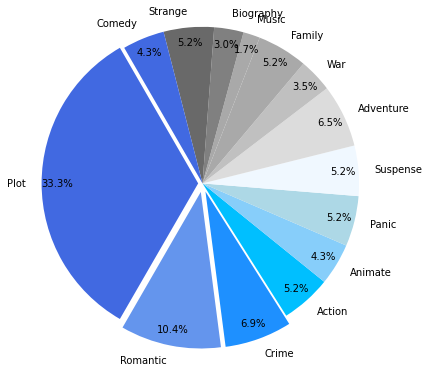

In [125]:
import matplotlib.pyplot as plt
data = df_T.Number
labels = df_T.Type.values
explode = [0.05,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0]
colors = ['royalblue','cornflowerblue','dodgerblue','deepskyblue','lightskyblue','lightblue','aliceblue','gainsboro','silver','darkgray','darkgrey','gray','dimgray']
plt.pie(data,labels=labels,explode=explode,autopct='%1.1f%%',colors=colors,shadow=False,startangle=120,pctdistance = 0.9,labeldistance = 1.1,radius=1.8)
plt.savefig("./Figures/Pie_Chart",bbox_inches="tight",dpi=300)
plt.show()

Bar chart of coutries

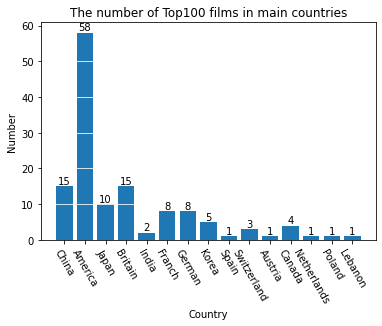

In [126]:
x_label = df_C.Country.values
y_number = df_C.Number.values
plt.bar(x_label,y_number)
plt.xlabel("Country")
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.xticks(rotation=300)
plt.ylabel("Number")
plt.title("The number of Top100 films in main countries")
for a, b in zip(x_label, y_number):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.savefig("./Figures/Category_Bar_Chart",bbox_inches="tight",dpi=300)
plt.show()

Table of directors

In [127]:
md = movies["Name_of_director"].value_counts(ascending=False)
md = md.reset_index()
md.columns = ["Director","Times"]
md[md.Times>1]
md.to_excel("./tables/directors.xlsx")

Histogram of years

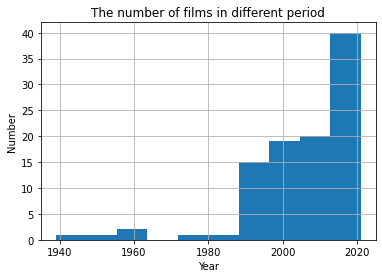

In [128]:
movies.Year.hist()
plt.xlabel("Year")
plt.ylabel("Number")
plt.title("The number of films in different period")
plt.savefig("./Figures/Category_Year",bbox_inches="tight",dpi=300)
plt.show()

Histogram of months

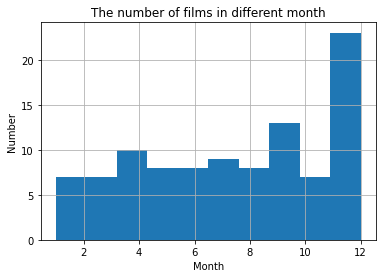

In [129]:
movies.Month.hist()
plt.xlabel("Month")
plt.ylabel("Number")
plt.title("The number of films in different month")
plt.savefig("./Figures/Category_Month",bbox_inches="tight",dpi=300)
plt.show()

Histogram of ratings

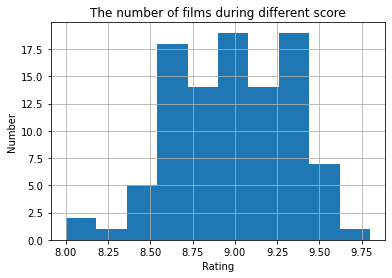

In [130]:
movies.Rating.hist()
plt.xlabel("Rating")
plt.ylabel("Number")
plt.title("The number of films during different score")
plt.savefig("./Figures/Category_Rating",bbox_inches="tight",dpi=300)
plt.show()

### 3.4.2 Relationship between two quantitative attributes

In [131]:
import seaborn as sns
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

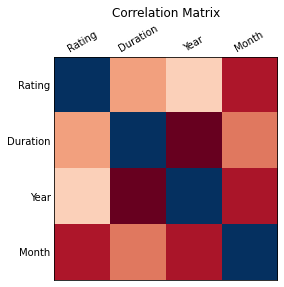

In [132]:
plt.matshow(movies[['Rating', 'Duration_min', 'Year', 'Month']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0)
plt.title("Correlation Matrix")
plt.xticks(range(4), ['Rating', 'Duration', 'Year', 'Month'],rotation=30)
plt.yticks(range(4), ['Rating', 'Duration', 'Year', 'Month'])
plt.savefig("./Figures/correlations_rating",bbox_inches="tight",dpi=300)
plt.show()

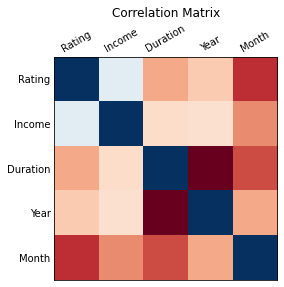

In [133]:
mi = movies[movies.Cumulative_income.notnull()]
plt.matshow(mi[['Rating', 'Cumulative_income', 'Duration_min', 'Year', 'Month']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0)
plt.title("Correlation Matrix")
plt.xticks(range(5), ['Rating', 'Income', 'Duration', 'Year', 'Month'],rotation=30)
plt.yticks(range(5), ['Rating', 'Income', 'Duration', 'Year', 'Month'])
plt.savefig("./Figures/correlations_income",bbox_inches="tight",dpi=300)
plt.show()

#### What factors affect rating?

Year 

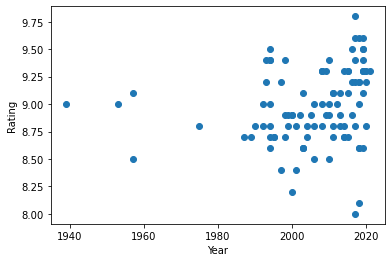

In [134]:
yr = movies[["Year","Rating"]]
plt.scatter(yr.Year,yr.Rating)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.savefig("./Figures/year_rating",bbox_inches="tight",dpi=300)
plt.show()

Duration

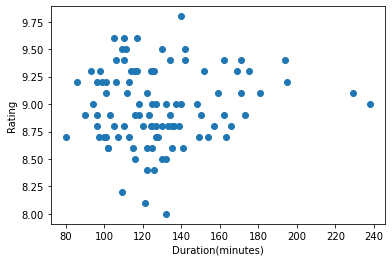

In [135]:
dr = movies[["Duration_min","Rating"]]
plt.scatter(dr.Duration_min,dr.Rating)
plt.xlabel("Duration(minutes)")
plt.ylabel("Rating")
plt.savefig("./Figures/duration_rating",bbox_inches="tight",dpi=300)
plt.show()

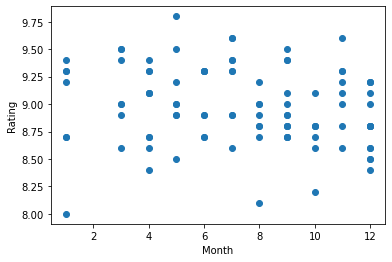

In [136]:
dr = movies[["Month","Rating"]]
plt.scatter(dr.Month,dr.Rating)
plt.xlabel("Month")
plt.ylabel("Rating")
plt.savefig("./Figures/month_rating",bbox_inches="tight",dpi=300)
plt.show()

#### What factors affect income?

Rating

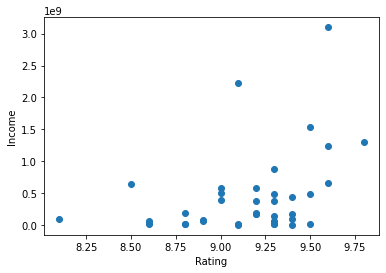

In [137]:
rc = movies[movies.Cumulative_income.notnull()]
rc = rc[["Cumulative_income","Rating"]]
plt.scatter(rc.Rating,rc.Cumulative_income)
plt.xlabel("Rating")
plt.ylabel("Income")
plt.savefig("./Figures/income_rating",bbox_inches="tight",dpi=300)
plt.show()

Month

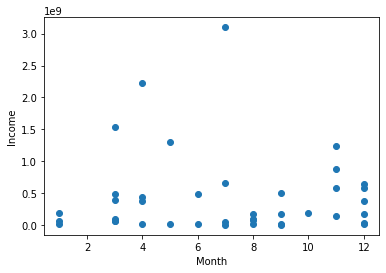

In [138]:
mc = movies[movies.Cumulative_income.notnull()]
plt.scatter(mc.Month,mc.Cumulative_income)
plt.xlabel("Month")
plt.ylabel("Income")
plt.savefig("./Figures/income_month",bbox_inches="tight",dpi=300)
plt.show()